In [404]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from textblob import TextBlob
from config import *
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import seaborn as sns
from datetime import datetime
from pprint import pprint
from itertools import cycle

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True)

In [457]:
accounts = []
sender = ''
#new_acc = '@PayPal'
#if new_acc not in accounts:
    #accounts.append(new_acc)
last_tweet_id = 0
query = '@SonikGryazzz'
accounts = [query]

In [458]:
mentions = api.search(query, count=10, result_type='recent')
len(mentions['statuses'])

3

In [354]:
for tweet in mentions['statuses']:
    print(tweet['id'])

982241369082052615
982241329525616642
982241233723539457


In [381]:
for tweet in mentions['statuses']:
    pprint(tweet['user']['name'])
    

'Sonya'
'Sonya'
'Sonya'


In [459]:
for tweet in mentions['statuses']:
    tweet_id = tweet['id']
    print(tweet_id)
    if tweet_id > last_tweet_id:
        try:
            new_acc = (f'@{tweet["entities"]["user_mentions"][-1]["screen_name"]}')
            print(f'new acc to check: {new_acc}')
            
            if not new_acc:
                break  
                
        except(IndexError):
            print('')
            
        if new_acc not in accounts:
            accounts.append(new_acc)
            sender = (f"{tweet['user']['name']} (@{tweet['user']['screen_name']})")
             
            print(f'sender is {sender}')
            print('---')
            
            blob_sent(new_acc, sender)
            api.update_with_media('Output/plot.png', f'New Tweet Analysis of {new_acc}. Thank you {sender}!')
            
        else:
            print('We\'ve analyzed it already')
            print('---------')

try:
    mentions['statuses'][0]['id'] = tweet_id
except(IndexError):
    print('No new account name in the tweet')

982241369082052615
new acc to check: @SonikGryazzz
We've analyzed it already
---------
982241329525616642
new acc to check: @justinbieber
sender is Sonya (@SonikGryazzz)
---
982241233723539457
new acc to check: @goingoutguide
sender is Sonya (@SonikGryazzz)
---


In [378]:
accounts

['@SonikGryazzz', '@justinbieber', '@goingoutguide']

In [416]:
sender

'Sonya (@SonikGryazzz)'

mentions = api.search(query, count=5, result_type='recent')

for tweet in mentions['statuses']:
    
    tweet_id = tweet['id']
    print(tweet_id)
    
    if tweet_id > last_tweet_id:
        
        try:
            new_acc = recent_tweet['entities']['user_mentions'][0]['screen_name']
            print(new_acc)
        
            if not new_acc:
                break
                
            sender = tweet['user']['screen_name']
            print(sender)
               
        except(IndexError):
            print('No new account name in the tweet')
        
        if new_acc not in accounts:
            accounts.append(f'@{new_acc}')
            #blob_sent(new_acc,sender)
        else:
            print('We\'ve analyzed it already')

recent_tweet = api.user_timeline(count=1, result_type='recent')

if last_tweet_id < recent_tweet[0]['id']:
    last_tweet_id = recent_tweet[0]['id']
new_acc = ''

try:
    new_acc = recent_tweet[0]['entities']['user_mentions'][-1]['screen_name']
except(IndexError):
    print('No account name in the tweet')

if (new_acc):
    print(new_acc)
    if new_acc not in accounts:
        accounts.append(f'@{new_acc}')
        #blob_sent(new_acc)
else:
    print('No new accounts to analyze')

In [394]:
#api.update_with_media('Ouptut/plot.png', f'New Tweet analysis. Thank you {sender}!')

['@PayPal', '@justinbieber']

In [395]:
#api.update_status('Test @SonikGryazzz Test tweet')

In [451]:
def two_plots(data,send,acc):
    df = pd.DataFrame(data)
    current_date = datetime.now().date().strftime("%d.%m.%Y")
    sns.set()
    
    feature_list = ['Polarity', 'Subjectivity']
    colors = cycle(['g', 'orange'])
    
    plt.figure(figsize=(7,9))
    for i in range(len(feature_list)):
        
        plt.subplot(2,1,i+1)
        plt.plot(df['Tweets Ago'], df[feature_list[i]], marker='o', linewidth=0.3, color=next(colors), alpha=0.9)
        plt.title(f'Sentiment Analysis of Tweets {feature_list[i]}\n by {acc} on {current_date}\n Requested by {send}')
        plt.ylabel(f'Tweets {feature_list[i]}')
        plt.ylim(-1.1,1.1)
        
    plt.tight_layout()    
    plt.savefig('Output/plot.png')

In [452]:
#df = pd.DataFrame(testdata)

In [453]:
#plt.plot(df['Tweets Ago'], df[i], marker='o', linewidth=0.3, color=next(colors), alpha=0.9)

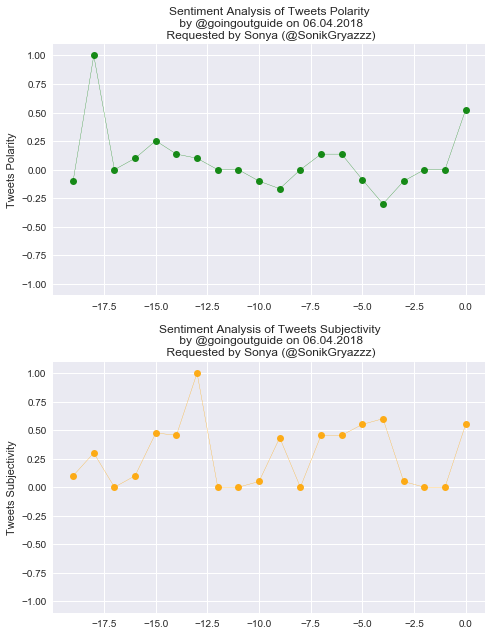

In [454]:
two_plots(testdata, 'Sonya (@SonikGryazzz)', '@goingoutguide')

In [401]:
# Function for plotting
def senti_plot(data,send,acc):
    df = pd.DataFrame(data)
    current_date = datetime.now().date().strftime("%d.%m.%Y")
    sns.set()
    
    #plt.figure()
    ax = df.plot(kind='line', x='Tweets Ago', y='Polarity', marker='o', linewidth=0.3, color='g', alpha=0.9)
    ax.set_ylim(-1.1, 1.1)
    ax.set_ylabel('Tweets Polarity')
    ax.set_title(f'Sentiment Analysis of Tweets by {acc} on ({current_date})\n Requested by {send}')
    plt.savefig('Output/plot.png')
    #return()

[]

In [417]:
def blob_sent(acc,send):
    
    total_mood = []
    last_tweet = None
    tweet_counter = 0
    send = send
    acc = acc
    
    for x in range(2):
        
        all_data = api.user_timeline(acc, count=10, max_id=last_tweet, page=x)
        
        for tweet in all_data:
            
            blob = TextBlob(tweet['text'])
            sentiment = blob.sentiment
            total_mood.append({'source': acc,
                             'Polarity': sentiment[0],
                             'Subjectivity': sentiment[1],
                             'Tweets Ago': tweet_counter,
                             'text': tweet['text'],
                             'time': tweet['created_at'],
                              'likes': tweet['favorite_count'],
                              'RT': tweet['retweet_count']})
            tweet_counter -= 1
        last_tweet = tweet["id"] - 1
    
    return two_plots(total_mood,send,acc)

In [455]:
#testdata = blob_sent('@goingoutguide', 'Sonya (@SonikGryazzz)')

In [ ]:
# Vader sentiment analysis
def senti_get(acc):
    
    total_mood = []
    last_tweet = None
    tweet_counter = 0
    
    for x in range(10):

        all_data = api.user_timeline(acc, count=50, max_id=last_tweet, page=x)
        
        for tweet in all_data:
            
            emotions = analyzer.polarity_scores(tweet['text'])
            
            total_mood.append({'source': acc,
                             'Polarity': emotions['compound'],
                             'positive': emotions['pos'],
                             'negative': emotions['neg'],
                             'neutral': emotions['neu'],
                             'Tweets Ago': tweet_counter,
                             'text': tweet['text'],
                             'time': tweet['created_at'],
                              'likes': tweet['favorite_count'],
                              'RT': tweet['retweet_count']})
            
            tweet_counter -= 1

        last_tweet = tweet["id"] - 1
    return(total_mood)